##Projeto Modulo4
Análise Exploratória de uma campanha de marketing de um banco privado 

Turma: 892 - Lets Code - Suzano

Alunos: 

Paulo Roberto P. Alves Jr

Lucas Guimarães 

Mateus Paranhos

Jean Kalyson

Francisco



####Introdução
Fonte dos dados: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification?select=new_train.csv

Houve uma queda de receita no Banco Português. Após investigação, descobriram que seus clientes não estavam investindo o suficiente para depósitos de longo prazo. Assim, o banco gostaria de identificar os clientes existentes com maior chance de subscrever um depósito de longo prazo e então, concentrar os esforços de marketing nesses clientes.
Iremos realizar a análise exploratória a fim de encontrar onde os esforços de marketing podem obter melhor retorno.

####Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

####Importando os dados
Fonte: kaggle

In [2]:
metadata = pd.read_csv('metadata.csv',sep=';')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 1000)
display(metadata)
#explicação sobre as colunas do dataframe

,"Feature,Feature_Type,Description"
0,"age,numeric,age of a person"
1,"job,Categorical,nominal,type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')"
2,"marital,categorical,nominal,marital status ('divorced','married','single','unknown', note: 'divorced' means divorced or widowed)"
3,"education,categorical,nominal,('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')"
4,"default,categorical,nominal,has credit in default? ('no','yes','unknown')"
5,"housing,categorical,nominal,has housing loan? ('no','yes','unknown')"
6,"loan,categorical,nominal,has personal loan? ('no','yes','unknown')"
7,"contact,categorical,nominal,contact communication type ('cellular','telephone')"
8,"month,categorical,ordinal,last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')"
9,"dayofweek,categorical,ordinal,last contact day of the week ('mon','tue','wed','thu','fri')"


In [3]:
#dataFrame
df = pd.read_csv('new_train.csv', sep=',')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


####Conhecendo um pouco mais sobre a base de dados
- Tipo de variáveis
- Tamanho do dataframe
- Se há dados faltantes
- Tratamento de dados se necessário
- Estatística descritiva (.describle())


In [4]:
df.info()
#tipo de variáveis/colunas/se há NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [5]:
df.shape[0]
#tamanho do df

32950

In [6]:
df.isnull().sum()
#não há dados faltantes

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [7]:
df.nunique()
#valores únicos por coluna
#exemplo, temos 75 idades diferentes nesse df e 12 profissões diferentes


age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

####Questionamentos de negócio:

- há um padrão de idade, ou de ligações que foram feitas na campanha? (analise univariada)
- Pessoas mais novas têm maior aceitação a investimentos mais longos se comparado com pessoas mais velhas?(analise bivariada)
- A escolaridade, ou o estado civil, aumenta a aceitação a investimentos mais longos?(analise bivariada)
- determinadas profissões tem maior aceitação a investimentos de longo prazo?(analise bivariada)
- Pessoas que investiram neste produto no passado retornaram ('poutcame' - qualidade do produto)(analise bivariada)
- a quantidade de ligações e a duração delas influencia no 'sim'?
- clientes que foram contatados a mais tempo tiveram mais tempo para pensar sobre o investimento. Eles fecharam?
- clientes de campanhas passadas que não fecharam a anterior tem maior probabilidade de fechar nessa campanha?
- há um tipo de contato para algum publico específico (idade, profissão ou estado civil) que fecha mais?
- há um dia ou mês mais fácil para fechar?
- clientes que possuem algum acesso a crédito tendem a fechar mais?
- clientes bons ou maus pagadores tendem a fechar?


####Analises univariadas
Conhecendo melhor cada coluna

In [8]:
#observando as estatísticas descritivas básicas do df (aqui dados numéricos)
df.describe(include='number')


,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [9]:
#observando as estatísticas descritivas básicas do df (aqui dados categóricos)
df.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


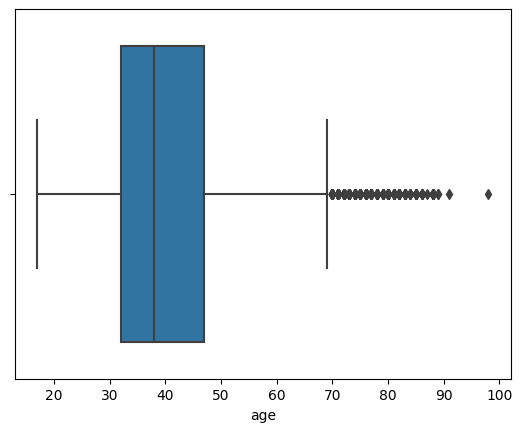

In [10]:
# a idade varia dos 17 aos 98 (range)
# mas 50% foram entre 30 e 50 anos
# e tirando os outliers, podemos afirmar que a pesquisa foi direcionada para um publico de 17 a 70 anos
# o que faz sentido se considerar que trata-se de produtos de "longo prazo"
sns.boxplot(data=df,x='age')
plt.show()

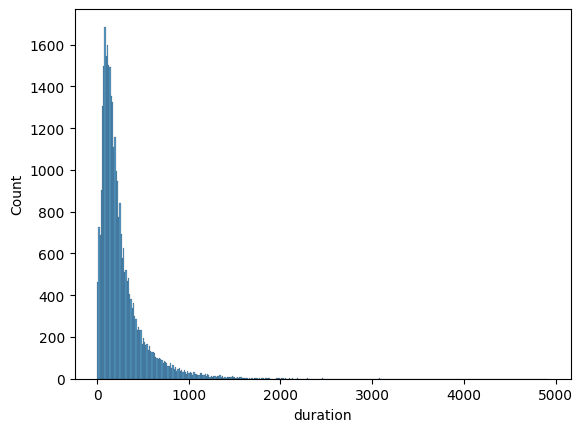

In [11]:
#A distribuição mostra que a maior quantidade de ligações teve pouca duração
sns.histplot(df['duration'])
plt.show()

Estatística Descritiva:
Campaign:
count    32950.000000
mean         2.560607
std          2.752326
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


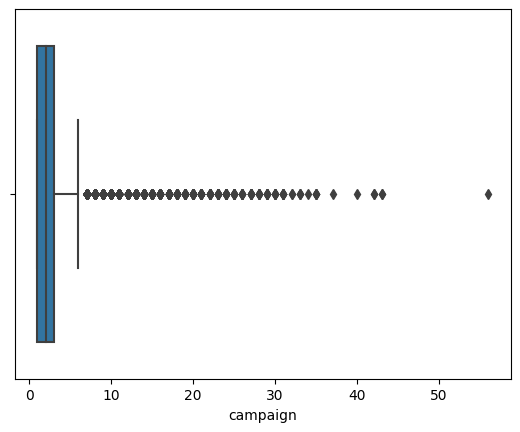

Houveram 2689 clientes que receberam mais de 5 ligações


In [12]:
# a presença de muitos outliers o que mostra um padrão de esforço que merece ser investigado 
# 75% dos clientes receberam até 3 ligações. Será que foram poucas?*Analisar fechamento desse grupo.
# e 2689 clientes receberam mais de 5 ligações. Será que o número de ligações impactou na venda do produto?

print(f'Estatística Descritiva:\nCampaign:\n{df.campaign.describe()}')
sns.boxplot(data=df,x='campaign')
plt.show()
print(f'Houveram {len(df.campaign[df.campaign > 5])} clientes que receberam mais de 5 ligações')

unknown           265
student           711
unemployed        798
housemaid         855
self-employed    1099
entrepreneur     1160
retired          1366
management       2345
services         3196
technician       5400
blue-collar      7441
admin.           8314
Name: job, dtype: int64


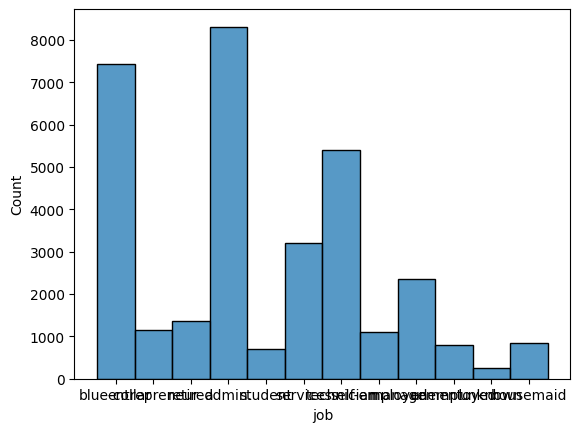

In [13]:
# analisando a variável categórica 'job'
# a campanha atingiu em menor proporção estudantes, desempregados, empregados domésticos e autonomos
# a campanha atingiu uma quantidade significativa de aposentados. 
# Será que, considerando os prazos de investimento, esse publico é interessante?*Analisar fechamento desse grupo.
print(df.job.value_counts(ascending=True))
sns.histplot(df['job'])
plt.show()

illiterate               16
unknown                1397
basic.6y               1865
basic.4y               3322
professional.course    4192
basic.9y               4826
high.school            7596
university.degree      9736
Name: education, dtype: int64


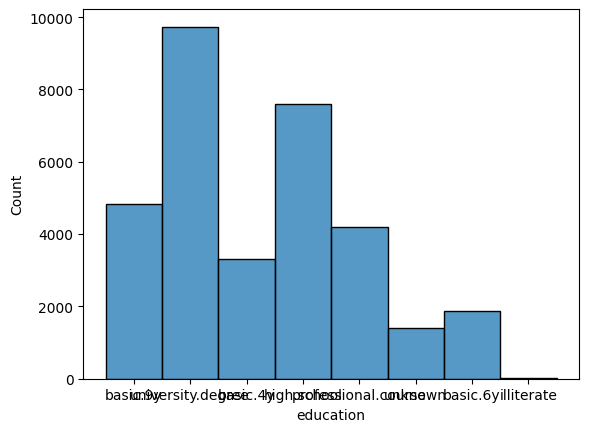

In [14]:
# analisando por escolaridade
# a campanha atingiu publico heterogêneo 
print(df.education.value_counts(ascending=True))
sns.histplot(df['education'])
plt.show()

unknown        65
divorced     3675
single       9257
married     19953
Name: marital, dtype: int64


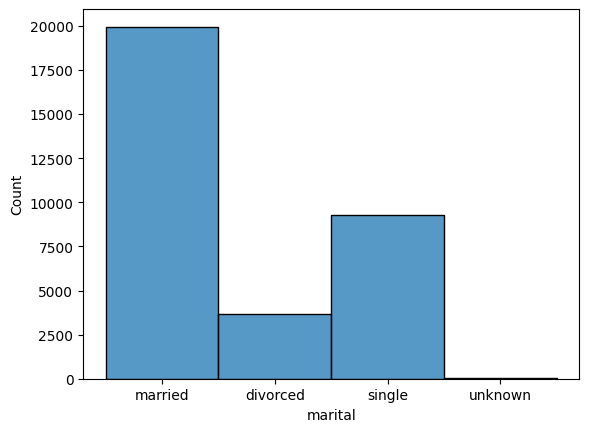

In [15]:
# mais de 50% do publico da campanha era casado.
# o que pode fazer sentido. *Analisar fechamento desse grupo.
print(df.marital.value_counts(ascending=True))
sns.histplot(df['marital'])
plt.show()

####Analise Bivariada

C:\Users\Samsung\AppData\Local\Temp\ipykernel_13348\1338771785.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2g',linecolor='white')


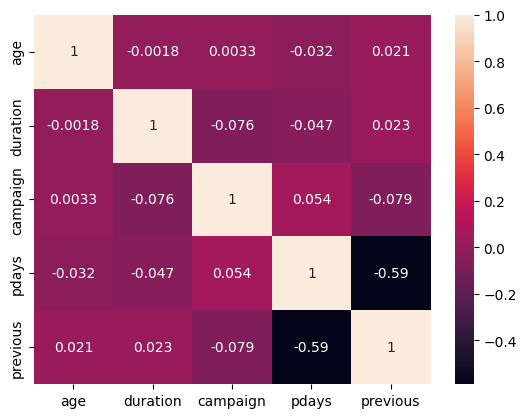

In [16]:
# aparentemente a maior correlação é negativa e ocorre entre pdays e previous

sns.heatmap(df.corr(), annot=True, fmt='.2g',linecolor='white')
plt.show()

C:\Users\Samsung\AppData\Local\Temp\ipykernel_13348\1887011624.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_999.corr(), annot=True, fmt='.2g',linecolor='white')


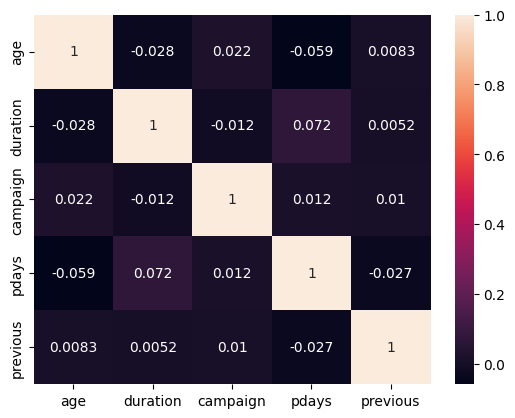

In [17]:
# 999 é codigo para informar que não houve contato em campanha anterior
#retirando 999 para entender se ainda existe correlação entre os dados

df_999 = df[df['pdays']!=999]
df_999
sns.heatmap(df_999.corr(), annot=True, fmt='.2g',linecolor='white')
plt.show()

# não há nenhuma correlação forte entre os dados numéricos


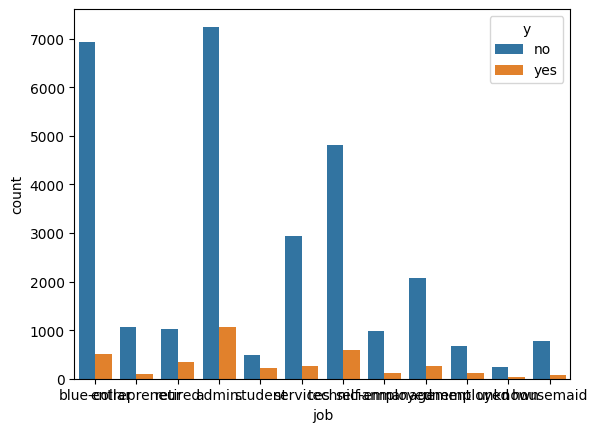

In [18]:
# a profissão administrador parece influenciar na aquisição dos produtos
sns.countplot(data=df, x='job', hue='y')
plt.show()

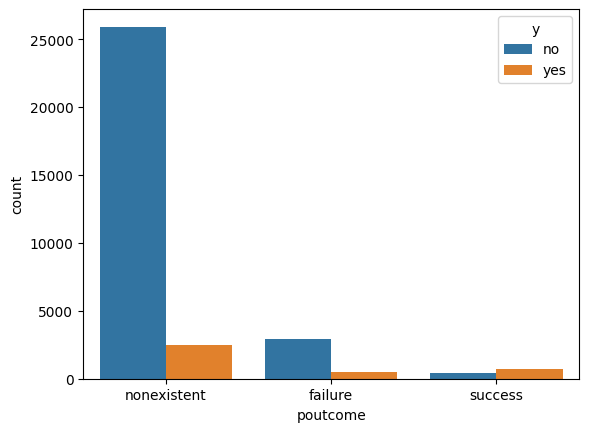

In [19]:
# interessante, a maioria das pessoas que fechou esse produto no passado
# fechou novamente agora. Isso dá uma ideia de aceitação ou qualidade do produto.
sns.countplot(data=df, x='poutcome', hue='y')
plt.show()

In [20]:
# analisando melhor o publico que tornou a fechar o produto.
# a idade permaneceu praticamente com a mesma distribuição
df_sucesso_anterior = df[df['poutcome']=='success']
df_sucesso_anterior.describe(include='number')

,age,duration,campaign,pdays,previous
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,41.835294,318.483258,1.797285,5.539367,1.575566
std,15.138013,255.943732,1.161190,3.522770,0.919761
min,17.000000,1.000000,1.000000,0.000000,1.000000
25%,30.000000,167.000000,1.000000,3.000000,1.000000
50%,37.000000,252.000000,1.000000,5.000000,1.000000
75%,52.000000,385.000000,2.000000,6.000000,2.000000
max,88.000000,3509.000000,8.000000,27.000000,7.000000


In [21]:
# o maior indice de fechamento se manteve igual ao publico geral
df_sucesso_anterior.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105
unique,12,4,7,2,3,3,2,10,5,1,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,success,yes
freq,336,584,426,1059,623,923,1015,172,252,1105,717


Nível de Escolaridade x yes:
y                       no   yes    All      yes %
education                                         
basic.4y              2978   344   3322  10.355208
basic.6y              1709   156   1865   8.364611
basic.9y              4457   369   4826   7.646084
high.school           6781   815   7596  10.729331
illiterate              13     3     16  18.750000
professional.course   3719   473   4192  11.283397
university.degree     8391  1345   9736  13.814708
unknown               1190   207   1397  14.817466
All                  29238  3712  32950  11.265554


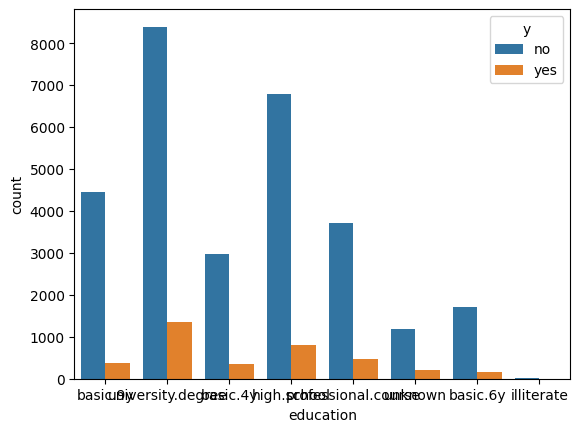

In [22]:
# há uma leve diferença por nível educacional
# mas não existe uma proporcionalidade entre o nível e o fechamento
educ_y = pd.crosstab(index=df["education"], columns=df["y"],margins=True)
educ_y['yes %'] = educ_y['yes']*100/educ_y['All']
print(f'Nível de Escolaridade x yes:\n{educ_y}')
sns.countplot(data=df, x='education', hue='y')
plt.show()

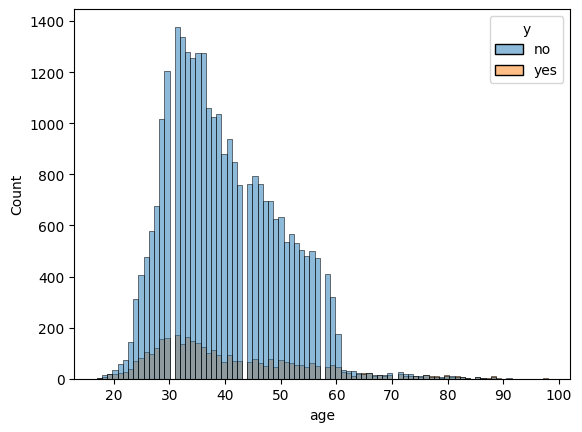

In [23]:
sns.histplot(data=df,x='age',hue='y')
plt.show()
# embora a parte mais expressiva esteja entre 20 e 40 anos.
# parece haver uma participação percentual de fechamento maior a partir dos 60anos.


In [24]:
#há um indice de fechamento 4x maior a partir dos 60anos
#aqui podemos colocar um input no stramlit
age = 60

qtd_60 = df.age[df['age']>age].count()
qtd_60_yes = df.age[(df['age']>age) & (df['y']=='yes')].count()
percentual_60mais_yes = qtd_60_yes*100/qtd_60
print(f'Pessoas com {age} anos tem {percentual_60mais_yes:.2f}% de fechamento')

Pessoas com 60 anos tem 45.45% de fechamento


####Analise Multivariada

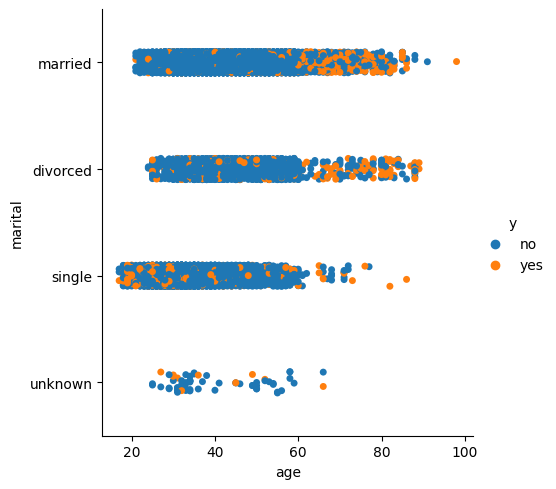

In [29]:
# a idade não parece influenciar na aquisição dos produtos
sns.catplot(x="age", y="marital", data=df, hue="y")
plt.show()

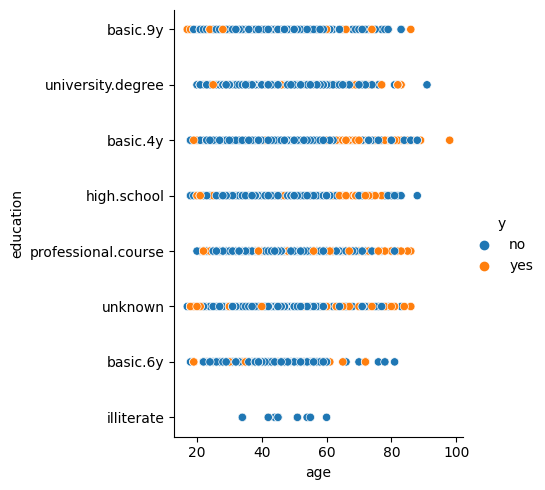

In [30]:
# retornando ao comparativo com idade. Agora idade x escolaridade x y
sns.relplot(data=df,x="age", y="education", hue="y")
plt.show()

In [27]:
# essa pode ser a função externa **DESNECESSÁRIO**
indice = df['education'].value_counts().index
total = df['education'].value_counts().values
df_yes = df[df['y']=='yes']
total_com_yes = df_yes['education'].value_counts().values
percentual = total_com_yes*100/total
t=0
for i in indice:
  print(f'{i:20}  {percentual[t]:5.2f}%')
  t+=1
# há uma leve diferença por nível educacional
# mas não existe uma proporcionalidade entre o nível e o fechamento

university.degree     13.81%
high.school           10.73%
basic.9y               9.80%
professional.course    8.80%
basic.4y              10.36%
basic.6y              11.10%
unknown               11.17%
illiterate            18.75%


In [28]:
# considerando o fator idade por nível educacional
age = 45
educ = 'professional.course'
age_educ = df.age[(df['age']>age) & (df['y']=='yes')].count()
age_educ_y = df.age[(df['age']>age) & (df['education']==educ) & (df['y']=='yes')].count()
percentual_age_educ_y = age_educ_y*100/age_educ
percentual_age_educ_y
print(f'Pessoas com {age} anos, ou mais, e com escolaridade-{educ} tem {percentual_age_educ_y:.2f}% de fechamento')

Pessoas com 45 anos, ou mais, e com escolaridade-professional.course tem 13.04% de fechamento
